### Notes

Action users take give insight into what their cards may be



In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import numpy as np
import random
np.set_printoptions(suppress=True)

search sorted tells us where this random should go to keep the cumsum of strategies sorted. essentially a random way to get a value with rr

In [13]:
getAction(getStrategy())

0

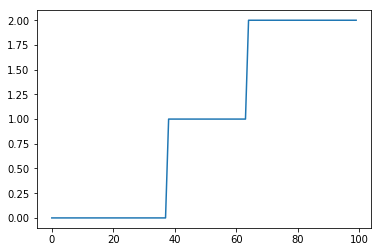

In [25]:
a = [getAction(getStrategy()) for _ in range(100)]
plot(sorted(a))

Shows how each strategy goes about 1/3 

rough idea of variance of moves

In [3]:
ROCK, PAPER, SCISSORS = 0,1,2
NUM_ACTIONS = 3
#oppStrategy = np.array([0.4, 0.3, 0.3])

def value(p1, p2):
    if p1 == p2:
        return 0
    if p1 == ROCK and p2 == SCISSORS:
        return 1
    elif p1 == SCISSORS and p2 == PAPER:
        return 1
    elif p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1

In [4]:
def normalize(strategy):
    strategy = np.copy(strategy)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(strategy.shape[0]) / strategy.shape[0]   
    return strategy

def getStrategy(regretSum):
    return normalize(np.maximum(regretSum, 0))

def getAverageStrategy(strategySum):     
    return normalize(strategySum)

def getAction(strategy):
    strategy = strategy / np.sum(strategy)
    return np.searchsorted(np.cumsum(strategy), random.random())

In [5]:
def innertrain(regretSum, strategySum, oppStrategy):
    # accumulate the current strategy based on regret
    strategy = getStrategy(regretSum)
    strategySum += strategy

    # select my action and opponent action
    myAction = getAction(strategy)
    otherAction = getAction(oppStrategy)

    # For R P S
    actionUtility = np.zeros(NUM_ACTIONS)
    actionUtility[otherAction] = 0
    actionUtility[(otherAction + 1) % NUM_ACTIONS] = 1
    actionUtility[(otherAction - 1) % NUM_ACTIONS] = -1    
    return regretSum, strategySum

In [6]:
def train(iterations):
    regretSum = np.zeros(NUM_ACTIONS)
    strategySum = np.zeros(NUM_ACTIONS)
    #oppStrategy = np.zeros(NUM_ACTIONS)
    oppStrategy = np.array([0.4, 0.3, 0.3])
    
    for i in range(iterations):
        regretSum, strategySum = innertrain(regretSum, strategySum, oppStrategy)
        
    return strategySum
        
def train2p(iterations):
    regretSumP1 = np.zeros(NUM_ACTIONS)
    strategySumP1 = np.zeros(NUM_ACTIONS)
    
    regretSumP2 = np.zeros(NUM_ACTIONS)
    strategySumP2 = np.zeros(NUM_ACTIONS)
    
    for i in range(iterations):
        # train p1
        oppStrategy = normalize(strategySumP2)
        regretSump1, strategySump1 = innertrain(regretSumP1, strategySumP1, oppStrategy)
        
        # train p2
        oppStrategy = normalize(strategySumP1)
        regretSumP2, strategySumP1 = innertrain(regretSumP2, strategySumP2, oppStrategy)
        
    return strategySumP1, strategySumP2

s1, s2 = train2p(1000)
normalize(s1), normalize(s2)

(array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]))

In [7]:
strategySum = train(100000)
getAverageStrategy(strategySum)

array([0.33333333, 0.33333333, 0.33333333])

In [8]:
strategy, oppStrategy = normalize(s1), normalize(s2)
strategy, oppStrategy

(array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]))

([<matplotlib.lines.Line2D at 0x7757588>], 0.725, 1.0)

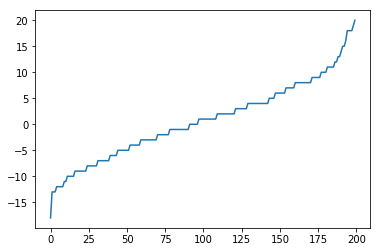

In [9]:
#strategy = getAverageStrategy(strategySum)
#print(strategy)

vvv = []
for j in range(200):
    vv = 0
    for i in range(100):
        #strategy = getStrategy()
        #strategy = np.array([0, 1, 0])  # Exploit opponent by always playing paper
        # Best we can do is get mean value around 10
        #strategy = getAverageStrategy()
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        vv += value(myAction, otherAction)
    vvv.append(vv)

plot(sorted(vvv)), np.mean(vvv), np.median(vvv)

#print('if we play 100 times, for a dollar each, I expect to be up: {} dollars'.format(np.mean(vvv)))

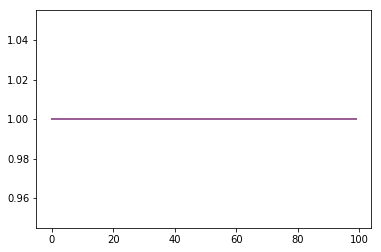

In [14]:
strategy = getAverageStrategy(strategySum)
for j in range(5):
    a = [getAction(getStrategy(strategy)) for _ in range(100)]
    plot(sorted(a))